In [ ]:
from google.colab import auth
import gspread
from google.auth import default


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den
from tensorflow.keras.metrics import RootMeanSquaredError as rmse


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [ ]:
sheet = gc.open('Mysample').sheet1
rows = sheet.get_all_values()


In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})



In [ ]:
# Assign X and Y values:

x = df[["Input"]] .values
y = df[["Output"]].values


In [ ]:
# Normalize the values & Split the data:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [ ]:
ai_brain = Seq([
    Den(9,activation = 'relu',input_shape=[1]),
    Den(16,activation = 'relu'),
    Den(1),
])



In [ ]:


ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')

ai_brain.fit(x_train,y_train,epochs=1000)
ai_brain.fit(x_train,y_train,epochs=1000)


Epoch 1/1000
1/1 [==============================] - 1s 802ms/step - loss: 89964.9531
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 89954.2656
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 89947.0156
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 89940.9844
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 89935.6953
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 89930.8594
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 89926.4922
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 89922.1797
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 89918.1484
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 89914.2500
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 89910.4141
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 89906.82

<Axes: >

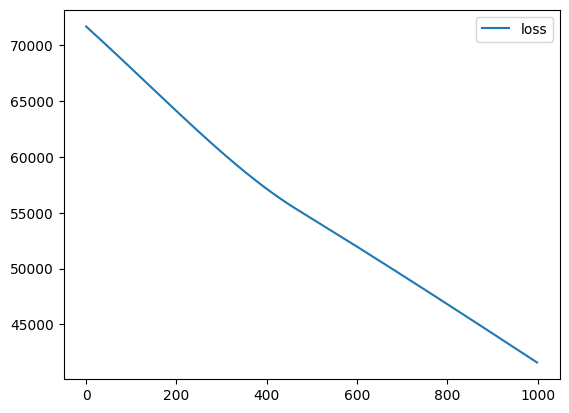

In [ ]:
loss_plot = pd.DataFrame(ai_brain.history.history)
loss_plot.plot()


In [ ]:
err = rmse()
preds = ai_brain.predict(x_test)
err(y_test,preds)



1/1 [==============================] - 1s 581ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=95.76842>

In [ ]:
x_n1 = [[9]]
x_n_n = scaler.transform(x_n1)
ai_brain.predict(x_n_n)


1/1 [==============================] - 0s 22ms/step


array([[122.527306]], dtype=float32)